# Plotting

*Plotting is a core component of scientific work --- papers live and die by their plots. This is especially true in data science disciplnes. As such, attention and care must be taken to create informative and aesthetic images.*

Julia has a robust plotting ecosystem in the Plots.jl package which we will cover here. Other plotting enviroments including, but not limited too: Makie, AlgebraOfGraphics, and UnicodePlots. UnicodePlots is particularly excellent for plotting inside the REPL environment. In addition, there are several auxillary plotting packages and we will cover only one here: StatsPlots. The others will be specific to your individual project and can be found through your search engine.

The key outcomes of this workbook are:
1. Basic Plots, Plot Objects, and Exporting Images
2. Subplots and the Subplot Layout Macro
3. Plot series types: scatter, line, and contourf
4. 3D Plots
5. Statistics Plots
6. Manipulate Toolbars
7. Animations

First, we need to load the Plots.jl package and select the backend. If Plots.jl is not installed it can be by running:

``using Pkg
Pkg.add("Plots")``

In [4]:
using Plots
pyplot()

Plots.PyPlotBackend()

The ``pyplot()`` function sets the Plots.jl backend - the software used to run the plotting code. The plotting team is currently developing plotting in Julia native code but it is a large task and is not ready yet. Some backends may need their own packages to be installed using the inbuilt package manager but you will not have to interact with this package outside of installing int. The backend we have selected is the Python backend and requires Python to be installed on your computer. It also requires PyCall and PyPlot to be installed through Julia (if they are not already). To do this run:

``using Pkg
Pkg.add("PyCall")
Pkg.add("PyPlot")``

Plots are created with the ``plot()`` function in Plots and this is the main function you will be interacting with going forward. It has extensive functionality and is well documented at: [JuliaPlots](https://docs.juliaplots.org/). 

## 1.0 Basic Plotting
### 1.1 A Simple Plot
For now we will start simple: a plot of $f(x) = x^2$. We will define the plotting range on [0,1] with intervals of 0.01 and apply $f(x)$ to this range to create the plotting data. Then, we feed this into the ``plot`` function to generate the plot.

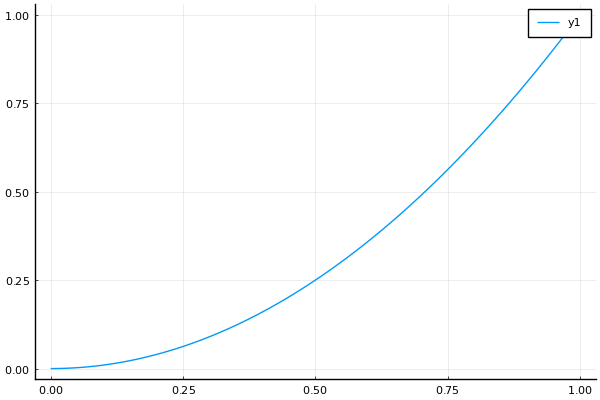

In [5]:
x = collect(0:0.01:1);
y = x .^ 2;
plot(x,y)

You might have noticed that took a while to generate --- upt to a minute on some computers! This is due to a large necessary precompilation time for the ``plot`` function. It also takes a substantial time to load the ``Plots.jl`` package. A datascience workflow is highly dependent on plots and to mitigate these high one-off costs it is highly recommended to work in either the REPL or a notebook where package loads and pre-compiling occurs only once as opposed to a terminal workflow which would require it to happen every time.

### 1.2 Plot Keywords

A key way of constructing a plot is to feed named keywords into the ``plot()`` function. Most of the labelling is quite intiutive but be sure to check the documentation for full list of options. Let's create the same plot with a title, labels, and a series label.

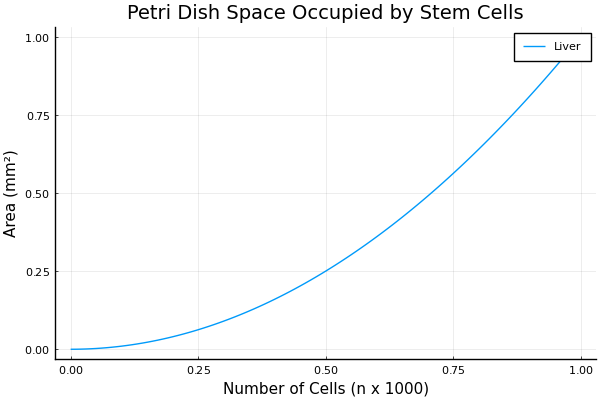

In [62]:
x = collect(0:0.01:1);
y = x .^ 2;
plot(x,y; title="Petri Dish Space Occupied by Stem Cells", xlabel="Number of Cells (n x 1000)", ylabel="Area (mm²)", label="Liver")

#### 1.3 Plot Objects

Every plot in julia is asscociated with a plot object. This allows for easy plot manipulation and for saving. The REPL remembers the last plot and can edit when no plot object is specified. This, however, is not recommended; a better practice is to give each object a variable name removing ambiguity. Let's recreate the first plot with a variable name.

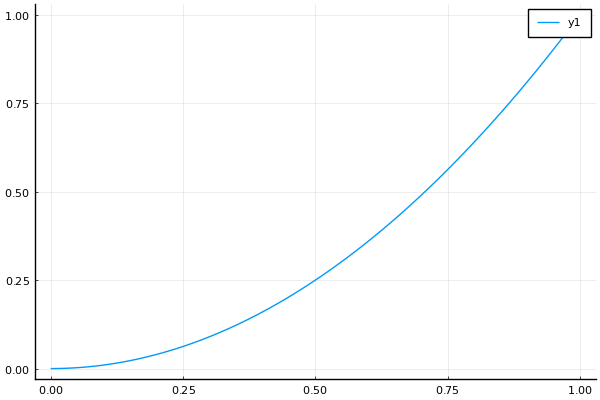

In [29]:
x = collect(0:0.01:1);
y = x .^ 2;
plt1 = plot(x,y)

### 1.4 Modifying Plots

The plot object ``plt1`` is again not very informative. To modify it we use an extension of the ``plot`` function: ``plot!``. The bang (!) operator in Julia is conventionally used to denote in-place modification and this is true for plots. The usage is simple: parse the plot variable as the first argument and every subsequent variable is identical to the ``plot`` function. Let's add a title, axes labels, and series label into the ``plt1`` object: 

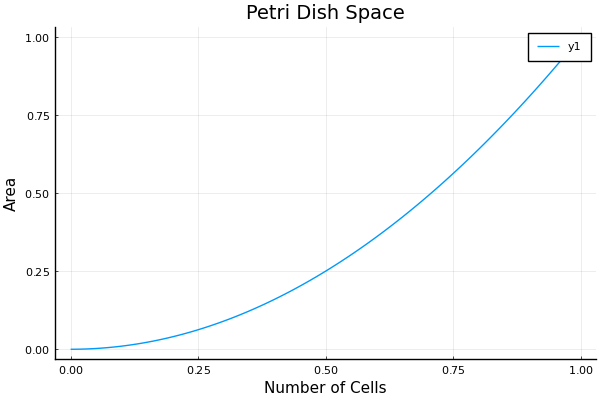

In [30]:
plot!(plt1;  title="Petri Dish Space", xlabel="Number of Cells", ylabel="Area")

Alternatively, we can modify the plot attributes by dedicated API calls. These will be familiar to those who have worked in a MATLAB environment. The full list of API calls can be found [here](https://docs.juliaplots.org/latest/api/). Let's fix the mistakes we made the first time.

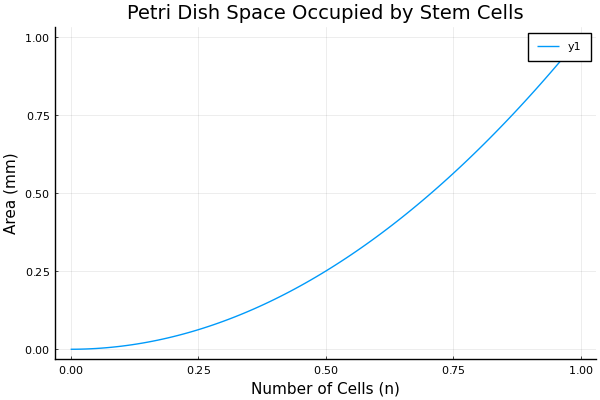

In [37]:
title!(plt1, "Petri Dish Space Occupied by Stem Cells")
xlabel!(plt1, "Number of Cells (n)")
ylabel!(plt1, "Area (mm²)")

Notice that we haven't modified the series label yet. This is the hardest attribute to modify as it doesn't have an API call and will not respond to the ``plot!`` function. To modify it we take the object-oriented approach by selecting the first series and changing the ``:label`` keyword.

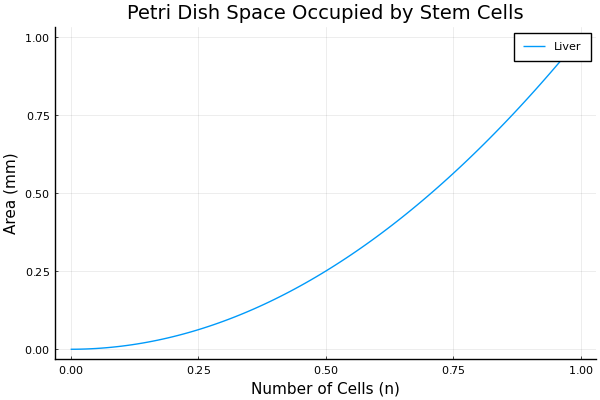

In [39]:
plt1[1][1][:label] = "Liver"
plt1

#### 1.5 Mutliple Series

Often we want to display multiple series in the same plot. This can be handled in a single line, if you have the data defined before hand, or using the ``plot!`` function to append a series to an existing plot object. Let's add another cell type to our graph.

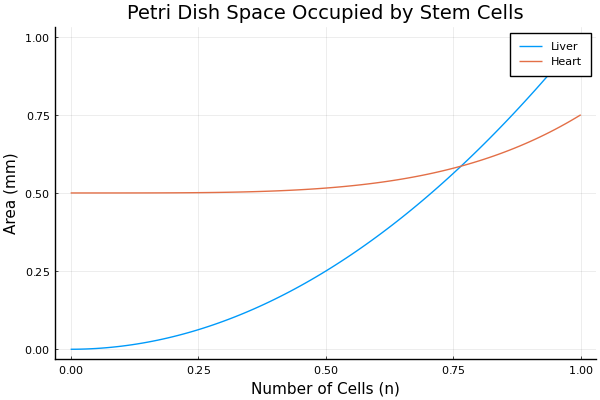

In [40]:
z = 0.5 .+  0.25 .* x .^ 4
plot!(plt1, x, z; label = "Heart")

There are several ways to plot multiple series of data with a single call to plot. The simplest logical structure to follow is feeding an x-axis range and a *space-delimited* vector of y-axis values: ``plot(x, [y1 y2 ...])``. This allows for an intiutive manipulation of the plot keywords which are given as a vector and broadcast to each series. Some useful series keywords are:

1. color = [:blue RGB(0,0,0)...]
2. linestyle = [:dashed ...]
3. linealpha = [0.4 ...]
4. label = ["Liver" "Heart" ...]


The full list can be found in the documentation.

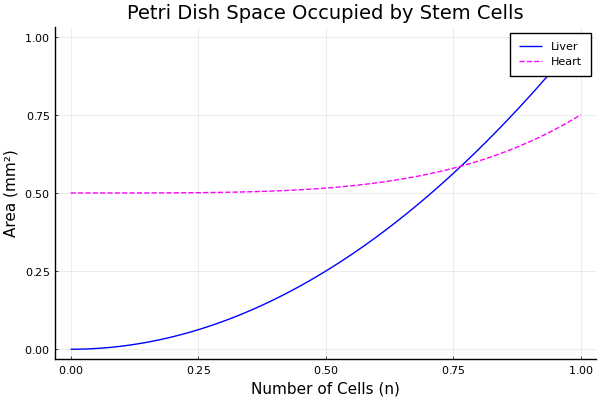

In [68]:
plt2 = plot(x, [y z];
    title="Petri Dish Space Occupied by Stem Cells", 
    xlabel="Number of Cells (n)", 
    ylabel="Area (mm²)",
    color=[:blue RGB(1,0,1)],
    linestyle=[:solid :dash],
    label=["Liver" "Heart"])

#### 1.6 Saving

Saving a plot is handled through the ``savefig`` call or a series of filetype specific API calls such as ``png``. The ``savefig`` call operates with two arguments referencing the plot object and save directory with file extension: ``savefig(obj, dir)``. If no plotting object is given then it refers to the last open plot object and saves it to the nonimated directory: ``savefig(dir)``. The directory is specified relative to the current working directory, is parsed as a string, and includes the file extension. The file extension allows the API to infer the format type the image should be saved as. [The documentation](https://docs.juliaplots.org/latest/output/) has a complete list of types and some useful ones include:

1. PNG
2. JPG
3. PDF
4. EPS
5. ...

Let's check the current directory with ``pwd()``.

In [66]:
pwd()

"/home/nicholas_gale/Documents/University/2022 (Postdoc Stephen and David)/Scientific Programming/Workbooks"

Now let's save both the figures we have created; ``plt1`` as a PDF and ``plt2`` as a PNG. We will target the ``figs`` subdirectory.

In [69]:
savefig(plt1, "figs/plt1.pdf")
savefig(plt2, "figs/plt2.png")

## 2.0 Subplots

### 2.1 Basic Layout

### 2.2 @layout Macro

## 3.0 Advanced Plots

Julia has first class support for a wide variety of useful plotting structures. These are typically given by the ``plot`` keyword argument ``seriestype`` or ``st`` for short. [The documentation](https://docs.juliaplots.org/latest/) gives a complete list but some typically useful types are:

1. scatter
2. contour and contourf
3. lineplot

Julia also has support for 3D plotting and for user defined recipes.

### Scatter Plots

### Contour Plots

### 3D Plots

### Recipes

## 4.0 Ecosystem: StatsPlots and GraphPlots

## 5.0 Data Exploration: Manipulate and Animate

It is often helpful to dynamically visualise data in the exploratory phase of a project and Julia offers two powerful tools to do this: manipulate and animate. The manipulate functionality allows you to program a 